In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.options.display.max_rows = 5       # Configuracion pandas
from prettytable import PrettyTable

In [13]:
train=pd.read_csv('coderhousetrain.csv',sep=',')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
test=pd.read_csv('test.csv',sep=',')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
train.duplicated().any()

False

In [17]:
print(train.shape)
train= train.drop_duplicates()
print(train.shape)

(1460, 81)
(1460, 81)


In [18]:
train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.50,421.61,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
...,...,...,...,...,...,...,...,...
YrSold,1460.0,2007.82,1.33,2006.0,2007.00,2008.0,2009.00,2010.0
SalePrice,1460.0,180921.20,79442.50,34900.0,129975.00,163000.0,214000.00,755000.0


In [19]:
pd.set_option('display.max_rows', None)  # or 1000
serie=(train.isnull().sum()/train.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

<AxesSubplot:>

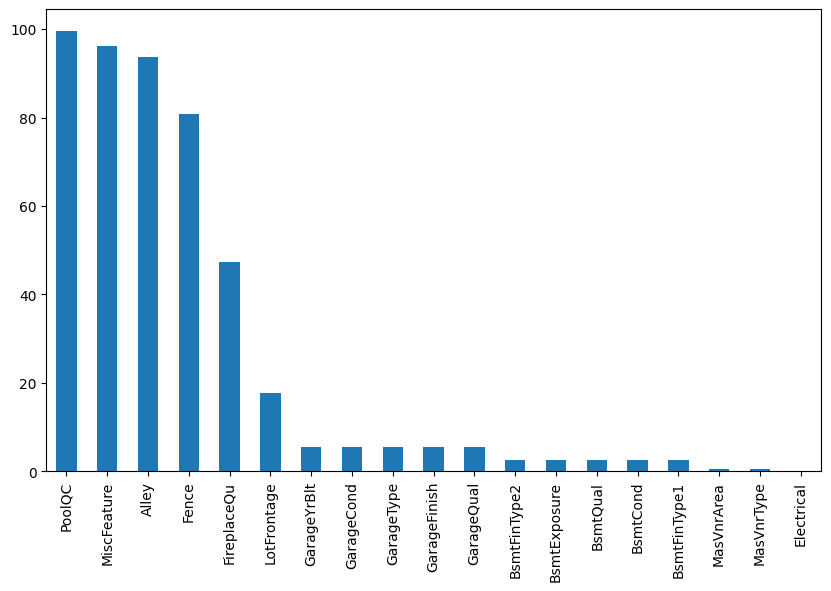

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

In [21]:

def df_explore(train):
    #Description table of the main characteristics of each column from a dataset
    print( 'Shape: ', train.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])
    
    for c in train.columns:
        t.add_row([c,
                   train[c].dtype,
                   len(train[c])-np.sum(train[c].isna()),
                   np.sum(train[c].isna()),
                   np.count_nonzero(train[c].unique()),
                   train[~train[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

df_explore(train)

Shape:  (1460, 81)
+---------------+---------+----------+-------+--------+---------+
|     Column    |   Type  | Non-Null | Nulls | Unique | Example |
+---------------+---------+----------+-------+--------+---------+
|       Id      |  int64  |   1460   |   0   |  1460  |    1    |
|   MSSubClass  |  int64  |   1460   |   0   |   15   |    60   |
|    MSZoning   |  object |   1460   |   0   |   5    |    RL   |
|  LotFrontage  | float64 |   1201   |  259  |  111   |   65.0  |
|    LotArea    |  int64  |   1460   |   0   |  1073  |   8450  |
|     Street    |  object |   1460   |   0   |   2    |   Pave  |
|     Alley     |  object |    91    |  1369 |   3    |   Grvl  |
|    LotShape   |  object |   1460   |   0   |   4    |   Reg   |
|  LandContour  |  object |   1460   |   0   |   4    |   Lvl   |
|   Utilities   |  object |   1460   |   0   |   2    |  AllPub |
|   LotConfig   |  object |   1460   |   0   |   5    |  Inside |
|   LandSlope   |  object |   1460   |   0   |   3    |  

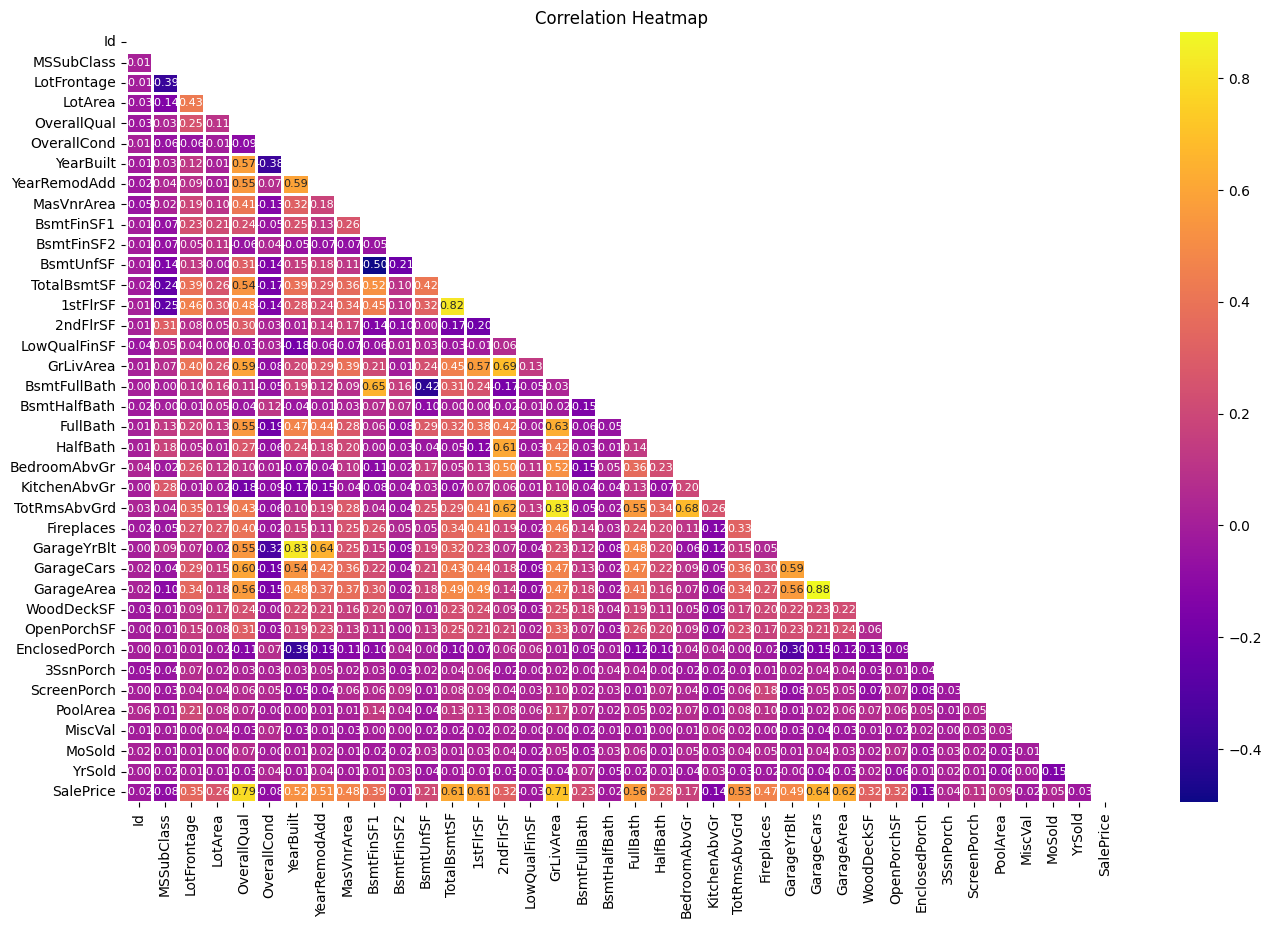

In [22]:
plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(train.corr(),dtype = bool))
sns.heatmap(train.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
col_del=['PoolQC','MiscFeature','Alley','Fence','Id'] 
col_inter= ['LotFrontage','GarageYrBlt','MasVnrArea'] 
col_cat= ['FireplaceQu','GarageFinish','GarageCond','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond',
          'BsmtQual','MasVnrType','Electrical'] 

In [24]:
# Borrar variables
train_x=train.drop(labels=col_del, axis=1) 
train_x.columns 

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [26]:
for i in col_inter: 
  train_x[i] = train_x[i].fillna(train_x[i].median())

In [27]:
train_x.MasVnrArea.isnull().sum()

0

In [28]:
for i in col_cat: # Reemplazar los vacios por Desconocido
  train_x[i] = train_x[i].fillna('Desconocido') 

In [29]:
train_x.Electrical.isnull().sum() # Verificando que funciona

0

In [30]:
train_x.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [31]:
alldata=[] # lista para guardar resultados de One hot Encoding
alldata1=[] # lista para guardar resultados de 
variables=[] # ir guardando las variables
for i in train_x.columns: # iterar sobre todas las columnas
  if train_x[i].dtype == 'O': # Quedarme con las que sean tipo object
    if len(train_x[i].unique()) ==2: # Si solo tienen dos categorias aplicar One Hot Encoding
      print('Variable 2 categorias:',i)
      y= pd.get_dummies(train_x[i]) # Aplicar One Hot Encoding
      alldata.append(y) # ir agregando las columnas resultantes en alldata
      variables.append(i)
    else:
      pass
    print('--------------------')
    if len(train_x[i].unique()) >2: # Si las categorias tienen mas de 2 categorias aplicar LabelEncoder
      print('Variable >2 categorias:',i)
      z= pd.DataFrame()
      z[i]=train_x[i].astype('category').cat.codes # Aplicar Label Encoder
      alldata1.append(z) # Agregar a la lista alldata1
      variables.append(i) #
  if train_x[i].dtype == 'float64': # Si la columna es numerica entonces normalizar z score
    train_x[i]=(train_x[i]-train_x[i].mean())/(train_x[i].std()) # yapo
data_y=pd.concat(alldata, axis=1) # concatenar las columnas obtenidas One hot Encoding
data_z=pd.concat(alldata1, axis=1) # concatenar las columnas de Label Encoder
train_y= pd.concat([data_y,data_z,train_x],axis=1) # Unir todos los datasets One Hot Encoding, LabelEncoder, Z score
train_y=train_y.drop(labels=variables, axis=1) # Borrar las columnas ya recodificadas
train_y.head() # mostrar que quedo

--------------------
Variable >2 categorias: MSZoning
Variable 2 categorias: Street
--------------------
--------------------
Variable >2 categorias: LotShape
--------------------
Variable >2 categorias: LandContour
Variable 2 categorias: Utilities
--------------------
--------------------
Variable >2 categorias: LotConfig
--------------------
Variable >2 categorias: LandSlope
--------------------
Variable >2 categorias: Neighborhood
--------------------
Variable >2 categorias: Condition1
--------------------
Variable >2 categorias: Condition2
--------------------
Variable >2 categorias: BldgType
--------------------
Variable >2 categorias: HouseStyle
--------------------
Variable >2 categorias: RoofStyle
--------------------
Variable >2 categorias: RoofMatl
--------------------
Variable >2 categorias: Exterior1st
--------------------
Variable >2 categorias: Exterior2nd
--------------------
Variable >2 categorias: MasVnrType
--------------------
Variable >2 categorias: ExterQual
------

,Grvl,Pave,AllPub,NoSeWa,N,Y,MSSubClass,LotFrontage,LotArea,OverallQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,1,0,0,1,60,-0.220799,8450,7,...,0,61,0,0,0,0,0,2,2008,208500
1,0,1,1,0,0,1,20,0.460162,9600,6,...,298,0,0,0,0,0,0,5,2007,181500
2,0,1,1,0,0,1,60,-0.084607,11250,7,...,0,42,0,0,0,0,0,9,2008,223500
3,0,1,1,0,0,1,70,-0.447787,9550,7,...,0,35,272,0,0,0,0,2,2006,140000
4,0,1,1,0,0,1,60,0.641752,14260,8,...,192,84,0,0,0,0,0,12,2008,250000


In [32]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Grvl           1460 non-null   uint8  
 1   Pave           1460 non-null   uint8  
 2   AllPub         1460 non-null   uint8  
 3   NoSeWa         1460 non-null   uint8  
 4   N              1460 non-null   uint8  
 5   Y              1460 non-null   uint8  
 6   MSSubClass     1460 non-null   int64  
 7   LotFrontage    1460 non-null   float64
 8   LotArea        1460 non-null   int64  
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  MasVnrArea     1460 non-null   float64
 14  BsmtFinSF1     1460 non-null   int64  
 15  BsmtFinSF2     1460 non-null   int64  
 16  BsmtUnfSF      1460 non-null   int64  
 17  TotalBsmtSF    1460 non-null   int64  
 18  1stFlrSF

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = train_y.drop(columns=['SalePrice']) # matriz de diseño
y = train_y.SalePrice # vector respuesta

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [36]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=12,learning_rate=0.1, loss='linear',random_state=42)

In [37]:
model = ada.fit(X_train, y_train)

In [38]:
y_pred = model.predict(X_test) # Sacar predicciones con test

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred))
print('MSE:', metrics.mean_squared_error(y_true=y_test, y_pred=y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)))

MAE: 30710.932638431696
MSE: 2087718012.728858
RMSE: 45691.55296910861


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(loss='squared_error',learning_rate=0.1, n_estimators=50, subsample=0.8,max_depth=4,criterion='friedman_mse',
                               random_state=42)

In [41]:
model1 = gbrt.fit(X_train, y_train)

In [42]:
y_pred = model1.predict(X_test)

In [43]:
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred))
print('MSE:', metrics.mean_squared_error(y_true=y_test, y_pred=y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)))

MAE: 18916.44510256173
MSE: 1996407028.6107483
RMSE: 44681.17085093841


In [44]:


import lightgbm as lgb #pip install lightgbm
clf = lgb.LGBMRegressor(boosting_type='gbdt',max_depth=4,num_leaves=20,learning_rate=0.01,n_estimators=100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [45]:
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred))
print('MSE:', metrics.mean_squared_error(y_true=y_test, y_pred=y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)))

MAE: 29416.403945656697
MSE: 1992042474.6615562
RMSE: 44632.303040080245


In [46]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [47]:
col_del=['PoolQC','MiscFeature','Alley','Fence','Id']
col_inter= ['LotFrontage','GarageYrBlt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',\
            'GarageCars','GarageArea']
col_cat= ['FireplaceQu','GarageFinish','GarageCond','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond',
          'BsmtQual','MasVnrType','Electrical']
test_x=test.drop(labels=col_del, axis=1)
for i in col_inter:
  test_x[i] = test_x[i].fillna(test_x[i].median())
for i in col_cat:
  test_x[i] = test_x[i].fillna('Desconocido')
alldata=[]
alldata1=[]
variables=[]
for i in test_x.columns:
  if test_x[i].dtype == 'O':
    if len(test_x[i].unique()) ==2:
      print('Variable 2 categorias:',i)
      y= pd.get_dummies(test_x[i])
      alldata.append(y)
      variables.append(i)
    else:
      pass
    print('--------------------')
    if len(test_x[i].unique()) >2:
      print('Variable >2 categorias:',i)
      z= pd.DataFrame()
      z[i]=test_x[i].astype('category').cat.codes
      alldata1.append(z)
      variables.append(i)
  if test_x[i].dtype == 'float64':
    test_x[i]=(test_x[i]-test_x[i].mean())/(test_x[i].std())
data_y=pd.concat(alldata, axis=1)
data_z=pd.concat(alldata1, axis=1)
test_y= pd.concat([data_y,data_z,test_x],axis=1) # Unir todos los datasets
test_y=test_y.drop(labels=variables, axis=1) # Borrar las columnas ya recodificadas
test_y.head()

--------------------
Variable >2 categorias: MSZoning
Variable 2 categorias: Street
--------------------
--------------------
Variable >2 categorias: LotShape
--------------------
Variable >2 categorias: LandContour
Variable 2 categorias: Utilities
--------------------
--------------------
Variable >2 categorias: LotConfig
--------------------
Variable >2 categorias: LandSlope
--------------------
Variable >2 categorias: Neighborhood
--------------------
Variable >2 categorias: Condition1
--------------------
Variable >2 categorias: Condition2
--------------------
Variable >2 categorias: BldgType
--------------------
Variable >2 categorias: HouseStyle
--------------------
Variable >2 categorias: RoofStyle
--------------------
Variable >2 categorias: RoofMatl
--------------------
Variable >2 categorias: Exterior1st
--------------------
Variable >2 categorias: Exterior2nd
--------------------
Variable >2 categorias: MasVnrType
--------------------
Variable >2 categorias: ExterQual
------

,Grvl,Pave,AllPub,N,Y,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,1,1,0,1,20,0.567135,11622,5,6,...,1.185515,140,0,0,0,120,0,0,6,2010
1,0,1,1,0,1,20,0.615752,14267,6,6,...,-0.740981,393,36,0,0,0,0,12500,6,2010
2,0,1,1,0,1,60,0.275437,13830,5,5,...,0.042522,212,34,0,0,0,0,0,3,2010
3,0,1,1,0,1,60,0.469903,9978,6,6,...,-0.012784,360,36,0,0,0,0,0,6,2010
4,0,1,1,0,1,120,-1.231670,5005,8,5,...,0.153134,0,82,0,0,144,0,0,1,2010


In [48]:
X_test.NoSeWa.value_counts() # Todo es cero entonces podemos crear una igual

0    292
Name: NoSeWa, dtype: int64

In [49]:
test_y['NoSeWa']=0
test_y.head()

,Grvl,Pave,AllPub,N,Y,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,NoSeWa
0,0,1,1,0,1,20,0.567135,11622,5,6,...,140,0,0,0,120,0,0,6,2010,0
1,0,1,1,0,1,20,0.615752,14267,6,6,...,393,36,0,0,0,0,12500,6,2010,0
2,0,1,1,0,1,60,0.275437,13830,5,5,...,212,34,0,0,0,0,0,3,2010,0
3,0,1,1,0,1,60,0.469903,9978,6,6,...,360,36,0,0,0,0,0,6,2010,0
4,0,1,1,0,1,120,-1.231670,5005,8,5,...,0,82,0,0,144,0,0,1,2010,0


In [51]:
interseccion = list(set(test_y.columns) & set(X_test.columns))
len(interseccion)
union = list(set(test_y.columns) | set(X_test.columns))
set(test_y.columns) ^ set(X_test.columns)

set()

In [52]:
y_pred = model.predict(test_y)
y_pred
df= pd.DataFrame()
df['Id']= test_y.index
df['Prediccion_Adaboost']= y_pred
y_pred1=gbrt.predict(test_y)
df['Prediccion_GradientBoosting']= y_pred1
y_pred2=clf.predict(test_y)
df['Prediccion_LightGBM']= y_pred2
df.head()

C:\Users\tomas\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\tomas\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,Id,Prediccion_Adaboost,Prediccion_GradientBoosting,Prediccion_LightGBM
0,0,124612.031180,109801.167622,139472.405239
1,1,129659.065041,132592.094262,151486.084763
2,2,124265.965753,114354.673518,134756.533787
3,3,124612.031180,116331.938382,140255.581565
4,4,125348.585837,127542.635736,150325.435959
